In [33]:
# 데이터 준비
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
PI = np.pi
x_full = np.linspace(-10*PI, 10*PI, 1000)
y_full = np.sin(x_full)

x_full_int = x_full //  (2*PI)
x_full_mod = x_full % (2*PI)

x_input = np.stack([x_full_int, x_full_mod], axis=1)  # shape: (1000, 2)

train_idx = x_full <= 6 * PI
valid_idx = (x_full > 6*PI) & (x_full <= 8*PI)
test_idx = x_full > 8*PI

x_train = x_input[train_idx]
y_train = y_full[train_idx].reshape(-1, 1)
x_valid = x_input[valid_idx]
y_valid = y_full[valid_idx].reshape(-1, 1)
x_test = x_input[test_idx]
y_test = y_full[test_idx].reshape(-1, 1)

In [34]:
def create_model():
    model = models.Sequential([
        layers.Input(shape=(2,)),  # Input 레이어로 입력 형태 정의
        layers.Dense(8, activation='tanh'),
        layers.Dense(32, activation='tanh'),
        layers.Dense(8, activation='tanh'),
        layers.Dense(1)
    ])
    return model

In [35]:
model = create_model()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ModelCheckpoint 콜백 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [36]:
history = model.fit(x_train, y_train,
                   epochs=200,
                   batch_size=32,
                   validation_data=(x_valid, y_valid),
                   verbose=1,
                   callbacks=[checkpoint])

# 테스트 데이터로 평가
best_model = tf.keras.models.load_model('best_model.keras')

# 테스트 데이터로 평가
test_loss, test_mae = best_model.evaluate(x_test, y_test, verbose=0)

Epoch 1/200
 1/25 ━━━━━━━━━━━━━━━━━━━━ 20s 870ms/step - loss: 0.5825 - mae: 0.6475
Epoch 1: val_loss improved from inf to 1.11086, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5051 - mae: 0.6167 - val_loss: 1.1109 - val_mae: 0.9410
Epoch 2/200
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3603 - mae: 0.5392
Epoch 2: val_loss improved from 1.11086 to 0.89228, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3297 - mae: 0.4911 - val_loss: 0.8923 - val_mae: 0.8553
Epoch 3/200
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2886 - mae: 0.4873
Epoch 3: val_loss improved from 0.89228 to 0.79958, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2569 - mae: 0.4415 - val_loss: 0.7996 - val_mae: 0.7942
Epoch 4/200
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1522 - mae: 0.3356
Epoch 4: val_loss improved from 0.79958 to 0.72971, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━

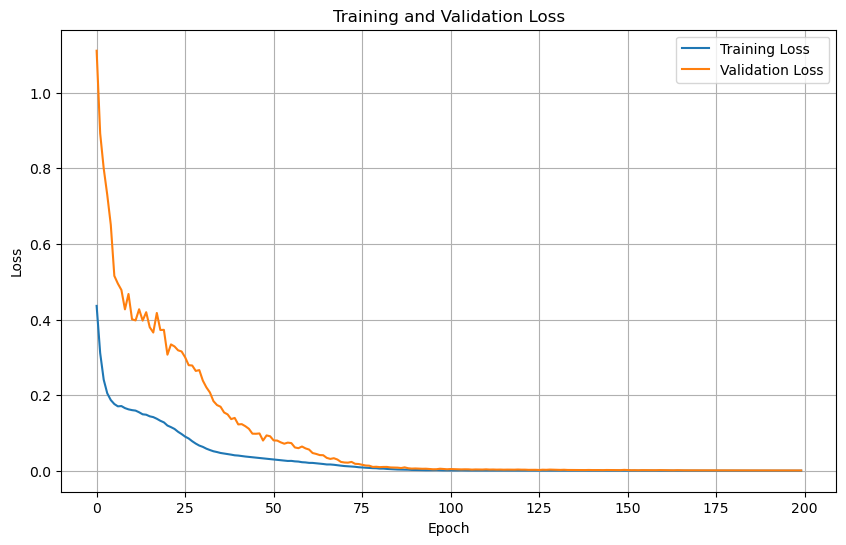

In [37]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(history.history['loss'], label='Training Loss')  # 훈련 손실
plt.plot(history.history['val_loss'], label='Validation Loss')  # 검증 손실
plt.xlabel('Epoch')  # x축 라벨
plt.ylabel('Loss')  # y축 라벨
plt.title('Training and Validation Loss')  # 그래프 제목
plt.legend()  # 범례 추가
plt.grid(True)  # 격자 추가
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


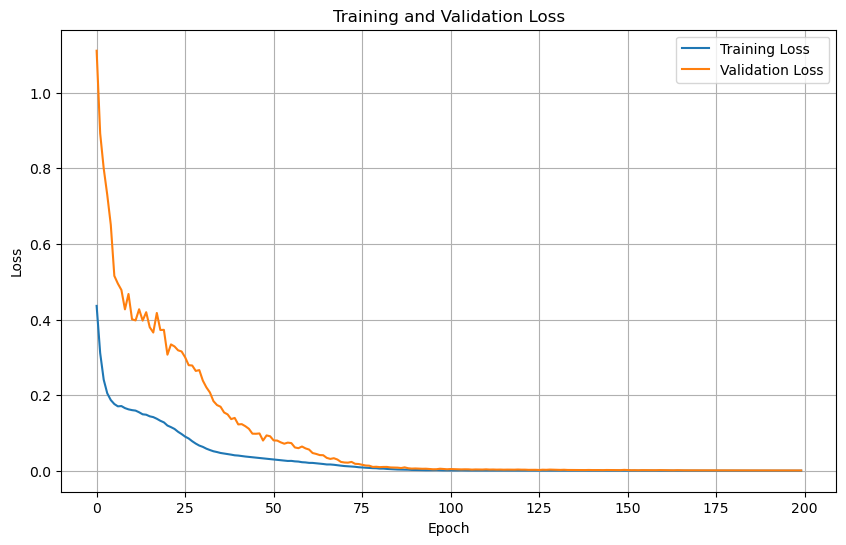

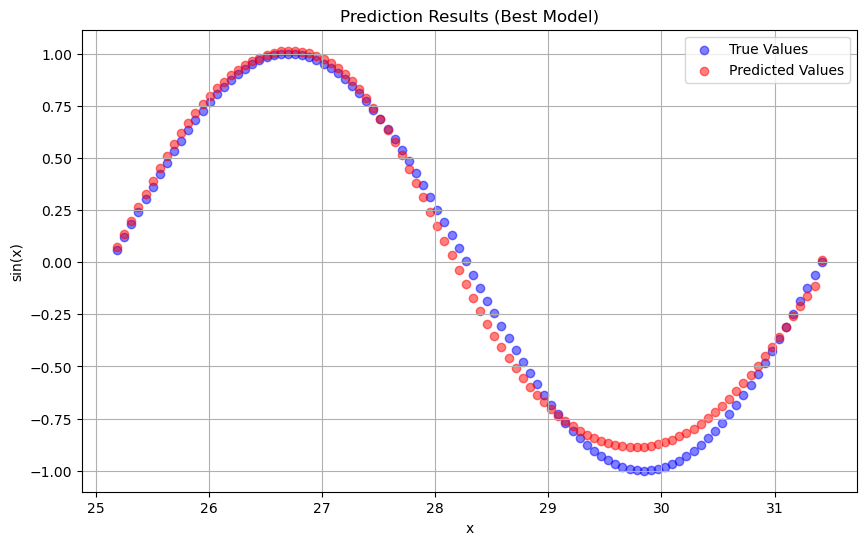

In [38]:
y_pred = best_model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 시각화 2: 예측 결과 그래프
plt.figure(figsize=(10, 6))
plt.scatter(x_full[test_idx], y_test, label='True Values', alpha=0.5, color='blue')
plt.scatter(x_full[test_idx], y_pred, label='Predicted Values', alpha=0.5, color='red')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Prediction Results (Best Model)')
plt.legend()
plt.grid(True)
plt.show()